## Generating synthetic dataset by using TabDDPM and Tabsyn for the existing dataset in the repo "adult"

In [20]:
import torch

if torch.cuda.is_available():
    print("CUDA is available.")
else:
    print("CUDA is not available.")

CUDA is available.


In [3]:
# cloned the gitHub Repository
! git clone https://github.com/amazon-science/tabsyn

fatal: destination path 'tabsyn' already exists and is not an empty directory.


In [1]:
import os
current_dir=os.getcwd()

In [2]:
# adding the path to teh cloned repository
current_dir = os.path.join(current_dir, 'tabsyn')

In [3]:
%cd $current_dir

C:\Users\neetu\Documents\Untitled_Folder\tabsyn


C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [11]:
!pip install dgl

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [12]:
!pip install peft

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [13]:
!pip install datasets

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [14]:
!pip install torch_geometric

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [14]:
!pip install torch_geometric

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
# install other dependencies
!pip install -r requirements.txt

  Using cached Click-7.0-py2.py3-none-any.whl (81 kB)
  Attempting uninstall: Click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7


DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
typer 0.9.0 requires click<9.0.0,>=7.1.1, but you have click 7.0 which is incompatible.


## Preparing Dataset

### Using the datasets adopted in the paper
#### Download raw dataset:

In [15]:
!python download_dataset.py

Start processing dataset adult from UCI.
Aready downloaded.
Start processing dataset default from UCI.
Aready downloaded.
Start processing dataset magic from UCI.
Aready downloaded.
Start processing dataset shoppers from UCI.
Aready downloaded.
Start processing dataset beijing from UCI.
Aready downloaded.
Start processing dataset news from UCI.
Aready downloaded.


Outcome: Downloaded the existing datasets from the repo

#### Process dataset:

In [5]:
! python process_dataset.py

adult (32561, 15) (16281, 15) (32561, 15)
Numerical (32561, 6)
Categorical (32561, 8)
Processing and Saving adult Successfully!
adult
Total 48842
Train 32561
Test 16281
Num 6
Cat 9
default (27000, 24) (3000, 24) (30000, 24)
Numerical (27000, 14)
Categorical (27000, 9)
Processing and Saving default Successfully!
default
Total 30000
Train 27000
Test 3000
Num 14
Cat 10
shoppers (11097, 18) (1233, 18) (12330, 18)
Numerical (11097, 10)
Categorical (11097, 7)
Processing and Saving shoppers Successfully!
shoppers
Total 12330
Train 11097
Test 1233
Num 10
Cat 8
magic (17117, 11) (1902, 11) (19019, 11)
Numerical (17117, 10)
Categorical (17117, 0)
Processing and Saving magic Successfully!
magic
Total 19019
Train 17117
Test 1902
Num 10
Cat 1
beijing (37581, 12) (4176, 12) (41757, 12)
Numerical (37581, 6)
Categorical (37581, 5)
Processing and Saving beijing Successfully!
beijing
Total 41757
Train 37581
Test 4176
Num 7
Cat 5
news (35679, 48) (3965, 48) (39644, 48)
Numerical (35679, 45)
Categorical (

Outcome : Processed all the above downloaded datasets and split the dataset into train and test, also calculated the numerical and categorical variables

In [17]:
# deactivate the anaconda environment
! conda deactivate

In [18]:
# reactivate the anaconda environent tddpm
!conda activate tabsyn

### Training Models


#### Training TabSyn Model for "adult" dataset

In [7]:
# train Tabddpm model for "adult" dataset
!python main.py --dataname adult --method tabddpm --mode train

START TRAINING
No NaNs in numerical features, skipping
110
{'num_classes': 2, 'is_y_cond': False, 'rtdl_params': {'d_layers': [1024, 2048, 2048, 1024], 'dropout': 0.0}, 'd_in': 110}
mlp
MLPDiffusion(
  (mlp): MLP(
    (blocks): ModuleList(
      (0): Block(
        (linear): Linear(in_features=1024, out_features=1024, bias=True)
        (activation): ReLU()
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): Block(
        (linear): Linear(in_features=1024, out_features=2048, bias=True)
        (activation): ReLU()
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (2): Block(
        (linear): Linear(in_features=2048, out_features=2048, bias=True)
        (activation): ReLU()
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (3): Block(
        (linear): Linear(in_features=2048, out_features=1024, bias=True)
        (activation): ReLU()
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
    (head): Linear(in_features=1024, out_featu

In [4]:
# train VAE first
!python main.py --dataname adult --method vae --mode train

at line 56
at line 58
at line 62
at line 75
No NaNs in numerical features, skipping
self.category_embeddings.weight.shape=torch.Size([104, 4])
self.category_embeddings.weight.shape=torch.Size([104, 4])
epoch: 0, beta = 0.010000, Train MSE: 8.847602, Train CE:2.329534, Train KL:0.478214, Val MSE:6.348080, Val CE:2.293221, Train ACC:0.230565, Val ACC:0.229292
epoch: 1, beta = 0.010000, Train MSE: 4.987253, Train CE:2.327764, Train KL:0.579063, Val MSE:3.403285, Val CE:2.364486, Train ACC:0.215537, Val ACC:0.216476
epoch: 2, beta = 0.010000, Train MSE: 2.400572, Train CE:2.370573, Train KL:0.925778, Val MSE:1.300023, Val CE:2.361062, Train ACC:0.221337, Val ACC:0.225600
epoch: 3, beta = 0.010000, Train MSE: 0.842879, Train CE:2.336249, Train KL:1.360649, Val MSE:0.512370, Val CE:2.288764, Train ACC:0.250907, Val ACC:0.255936
epoch: 4, beta = 0.010000, Train MSE: 0.434468, Train CE:2.247717, Train KL:1.737019, Val MSE:0.335923, Val CE:2.155007, Train ACC:0.289935, Val ACC:0.297361
epoch: 5


Epoch 1/50: 100%|##########| 8/8 [00:12<00:00,  1.51s/it]

Epoch 2/50: 100%|##########| 8/8 [00:10<00:00,  1.32s/it]

Epoch 3/50: 100%|##########| 8/8 [00:09<00:00,  1.15s/it]

Epoch 4/50: 100%|##########| 8/8 [00:10<00:00,  1.32s/it]

Epoch 5/50: 100%|##########| 8/8 [00:10<00:00,  1.33s/it]

Epoch 6/50: 100%|##########| 8/8 [00:10<00:00,  1.28s/it]

Epoch 7/50: 100%|##########| 8/8 [00:10<00:00,  1.31s/it]

Epoch 8/50: 100%|##########| 8/8 [00:10<00:00,  1.29s/it]

Epoch 9/50: 100%|##########| 8/8 [00:10<00:00,  1.26s/it]

Epoch 10/50: 100%|##########| 8/8 [00:09<00:00,  1.22s/it]

Epoch 11/50: 100%|##########| 8/8 [00:10<00:00,  1.31s/it]

Epoch 12/50: 100%|##########| 8/8 [00:10<00:00,  1.34s/it]

Epoch 13/50: 100%|##########| 8/8 [00:11<00:00,  1.42s/it]

Epoch 14/50: 100%|##########| 8/8 [00:10<00:00,  1.36s/it]

Epoch 15/50: 100%|##########| 8/8 [00:10<00:00,  1.26s/it]

Epoch 16/50: 100%|##########| 8/8 [00:11<00:00,  1.45s/it]

Epoch 17/50: 100%|##########| 8/8 [00:10<00:00, 

Outcome: Took the longest time even after decreasing the epoch to 50 from 4000.

In [6]:
# after the VAE is trained, train the diffusion model
!python main.py --dataname adult --method tabsyn --mode train


Epoch 1/101: 100%|##########| 8/8 [00:11<00:00,  1.42s/it, Loss=1.02]

Epoch 2/101: 100%|##########| 8/8 [00:10<00:00,  1.32s/it, Loss=0.977]

Epoch 3/101: 100%|##########| 8/8 [00:11<00:00,  1.47s/it, Loss=0.924]

Epoch 4/101: 100%|##########| 8/8 [00:09<00:00,  1.22s/it, Loss=0.876]

Epoch 5/101: 100%|##########| 8/8 [00:10<00:00,  1.34s/it, Loss=0.874]

Epoch 6/101: 100%|##########| 8/8 [00:10<00:00,  1.26s/it, Loss=0.84]

Epoch 7/101: 100%|##########| 8/8 [00:09<00:00,  1.25s/it, Loss=0.804]

Epoch 8/101: 100%|##########| 8/8 [00:12<00:00,  1.56s/it, Loss=0.758]

Epoch 9/101: 100%|##########| 8/8 [00:12<00:00,  1.56s/it, Loss=0.738]

Epoch 10/101: 100%|##########| 8/8 [00:14<00:00,  1.78s/it, Loss=0.684]

Epoch 11/101: 100%|##########| 8/8 [00:15<00:00,  1.88s/it, Loss=0.651]

Epoch 12/101: 100%|##########| 8/8 [00:15<00:00,  1.92s/it, Loss=0.614]

Epoch 13/101: 100%|##########| 8/8 [00:18<00:00,  2.32s/it, Loss=0.574]

Epoch 14/101: 100%|##########| 8/8 [00:13<00:00,  1.68s/it, L

C:\Users\neetu\Documents\Untitled_Folder\tabsyn\tabsyn/ckpt/adult/
MLPDiffusion(
  (proj): Linear(in_features=60, out_features=1024, bias=True)
  (mlp): Sequential(
    (0): Linear(in_features=1024, out_features=2048, bias=True)
    (1): SiLU()
    (2): Linear(in_features=2048, out_features=2048, bias=True)
    (3): SiLU()
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): SiLU()
    (6): Linear(in_features=1024, out_features=60, bias=True)
  )
  (map_noise): PositionalEmbedding()
  (time_embed): Sequential(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): SiLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
  )
)
the number of parameters 10616892
Time:  1846.8857424259186
C:\Users\neetu\Documents\Untitled_Folder\tabsyn\tabsyn/ckpt/adult/
MLPDiffusion(
  (proj): Linear(in_features=60, out_features=1024, bias=True)
  (mlp): Sequential(
    (0): Linear(in_features=1024, out_features=2048, bias=True)
    (1): SiLU()
    (2): 


Epoch 1/101: 100%|##########| 8/8 [00:15<00:00,  1.95s/it, Loss=1.02]

Epoch 2/101: 100%|##########| 8/8 [00:14<00:00,  1.83s/it, Loss=0.955]

Epoch 3/101: 100%|##########| 8/8 [00:15<00:00,  1.90s/it, Loss=0.893]

Epoch 4/101: 100%|##########| 8/8 [00:14<00:00,  1.85s/it, Loss=0.836]

Epoch 5/101: 100%|##########| 8/8 [00:15<00:00,  1.97s/it, Loss=0.77]

Epoch 6/101: 100%|##########| 8/8 [00:14<00:00,  1.82s/it, Loss=0.71]

Epoch 7/101: 100%|##########| 8/8 [00:12<00:00,  1.60s/it, Loss=0.713]

Epoch 8/101: 100%|##########| 8/8 [00:15<00:00,  1.96s/it, Loss=0.645]

Epoch 9/101: 100%|##########| 8/8 [00:15<00:00,  2.00s/it, Loss=0.617]

Epoch 10/101: 100%|##########| 8/8 [00:21<00:00,  2.71s/it, Loss=0.595]

Epoch 11/101: 100%|##########| 8/8 [00:24<00:00,  3.09s/it, Loss=0.561]

Epoch 12/101: 100%|##########| 8/8 [00:32<00:00,  4.02s/it, Loss=0.556]

Epoch 13/101: 100%|##########| 8/8 [00:34<00:00,  4.34s/it, Loss=0.528]

Epoch 14/101: 100%|##########| 8/8 [00:38<00:00,  4.83s/it, Lo

In [40]:
#Generating the synthetic data by trained tabddpm model and saving it to synthetic/adult/tabppm.csv
!python main.py --dataname adult --method tabddpm --mode sample --save_path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabddpm.csv

START SAMPLING
No NaNs in numerical features, skipping
mlp
torch.Size([10000, 104])
Sample timestep  999
Sample timestep  998
Sample timestep  997
Sample timestep  996
Sample timestep  995
Sample timestep  994
Sample timestep  993
Sample timestep  992
Sample timestep  991
Sample timestep  990
Sample timestep  989
Sample timestep  988
Sample timestep  987
Sample timestep  986
Sample timestep  985
Sample timestep  984
Sample timestep  983
Sample timestep  982
Sample timestep  981
Sample timestep  980
Sample timestep  979
Sample timestep  978
Sample timestep  977
Sample timestep  976
Sample timestep  975
Sample timestep  974
Sample timestep  973
Sample timestep  972
Sample timestep  971
Sample timestep  970
Sample timestep  969
Sample timestep  968
Sample timestep  967
Sample timestep  966
Sample timestep  965
Sample timestep  964
Sample timestep  963
Sample timestep  962
Sample timestep  961
Sample timestep  960
Sample timestep  959
Sample timestep  958
Sample timestep  957
Sample timest

In [41]:
# Generating synthetic data by trained tabsyn model and saving it to synthetic/adult/tabsyn.csv
!python main.py --dataname adult --method tabsyn --mode sample --save_path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabsyn.csv

No NaNs in numerical features, skipping
(32561, 9)
Time: 23.000349521636963
Saving sampled data to C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabsyn.csv


## Evaluation

### Density estimation of single column and pair-wise correlation

In [42]:
!python eval/eval_density.py --dataname adult --model tabddpm --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabddpm.csv

C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabddpm.csv
Generating report ...

(1/2) Evaluating Column Shapes: : 100%|##########| 15/15 [00:00<00:00, 129.01it/s]

(2/2) Evaluating Column Pair Trends: : 100%|##########| 105/105 [00:03<00:00, 28.90it/s]

Overall Quality Score: 46.69%

Properties:
- Column Shapes: 55.91%
- Column Pair Trends: 37.48%
Generating report ...

(1/3) Evaluating Coverage: : 100%|##########| 15/15 [00:00<00:00, 317.35it/s]

(2/3) Evaluating Boundary: : 100%|##########| 15/15 [00:00<?, ?it/s]

(3/3) Evaluating Synthesis: : 100%|##########| 1/1 [00:00<00:00, 63.96it/s]

Diagnostic Results:

SUCCESS:


Traceback (most recent call last):
  File "C:\Users\neetu\Documents\Untitled_Folder\tabsyn\eval\eval_density.py", line 99, in <module>
    diag_report.generate(new_real_data, new_syn_data, metadata)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\base_report.py", line 155, in generate
    self._handle_results(verbose)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\single_table\diagnostic_report.py", line 29, in _handle_results
    self._results_handler.print_results(self._properties, verbose)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\_results_handler.py", line 149, in print_results
    self._print_results_for_level('SUCCESS')
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\_results_handler.py", line 117, in _print_results_for_level
    sys.stdout.write(f'{level_marks[level]} {result}\n')
  File "C:\Users\neetu\anaconda3\envs\tab\lib\encodings\cp1252.py", line 1

Outcome: For model TabDDPM the result as below for Density estimation of single column and pair-wise correlation

- Overall Quality Score: 46.69%

Properties:
- Column Shapes: 55.91%
- Column Pair Trends: 37.48%

In [43]:
!python eval/eval_density.py --dataname adult --model tabsyn --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabsyn.csv

C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabsyn.csv
Generating report ...

(1/2) Evaluating Column Shapes: : 100%|##########| 15/15 [00:00<00:00, 56.07it/s]

(2/2) Evaluating Column Pair Trends: : 100%|##########| 105/105 [00:03<00:00, 30.36it/s]

Overall Quality Score: 89.42%

Properties:
- Column Shapes: 93.4%
- Column Pair Trends: 85.44%
Generating report ...

(1/3) Evaluating Coverage: : 100%|##########| 15/15 [00:00<00:00, 480.01it/s]

(2/3) Evaluating Boundary: : 100%|##########| 15/15 [00:00<00:00, 584.96it/s]

(3/3) Evaluating Synthesis: : 100%|##########| 1/1 [00:00<00:00, 163.64it/s]

Diagnostic Results:

SUCCESS:


Traceback (most recent call last):
  File "C:\Users\neetu\Documents\Untitled_Folder\tabsyn\eval\eval_density.py", line 99, in <module>
    diag_report.generate(new_real_data, new_syn_data, metadata)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\base_report.py", line 155, in generate
    self._handle_results(verbose)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\single_table\diagnostic_report.py", line 29, in _handle_results
    self._results_handler.print_results(self._properties, verbose)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\_results_handler.py", line 149, in print_results
    self._print_results_for_level('SUCCESS')
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\_results_handler.py", line 117, in _print_results_for_level
    sys.stdout.write(f'{level_marks[level]} {result}\n')
  File "C:\Users\neetu\anaconda3\envs\tab\lib\encodings\cp1252.py", line 1

Outcome: For model TabSyn the result as below for Density estimation of single column and pair-wise correlation

- Overall Quality Score: 89.42%

Properties:
- Column Shapes: 93.4%
- Column Pair Trends: 85.44%

| TabDDPM                        | TabSyn                        |
| ------------------------------- | ----------------------------- |
| Overall Quality Score: 46.69%   | Overall Quality Score: 89.42% |
| Properties:                     | Properties                    |
| Column Shapes: 55.91            | Column Shapes: 93.4%          |
| Column Pair Trends: 37.48%      | Column Pair Trends: 85.44%    |


### Alpha Precision and Beta Recall1. Alpha
-preicison: the fidelity of synthetic dat a2. Beta
-recall: the diversity of synthetic data

In [44]:
!python eval/eval_quality.py --dataname adult --model tabddpm --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabddpm.csv

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode
C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabddpm.csv
=========== All Features ===========
Data shape:  (32561, 110)
alpha precision: 0.521103, beta recall: 0.000340


Outcome: The values of alpha precision and beta recall for TabDDPM model
- alpha precision: 0.521103
- beta recall: 0.000340

In [45]:
!python eval/eval_quality.py --dataname adult --model tabsyn --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabsyn.csv

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode
C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabsyn.csv
=========== All Features ===========
Data shape:  (32561, 110)
alpha precision: 0.900255, beta recall: 0.328657


Outcome: The values of alpha precision and beta recall for TabSyn model
- alpha precision: 0.900255
- beta recall: 0.328657

| TabDDPM                        | TabSyn                        |
| ------------------------------- | ----------------------------- |
|  alpha precision: 0.521103 | alpha precision: 0.900255 |
|    - beta recall: 0.000340                  | beta recall: 0.328657                   |


### Machine Learning Efficiency

In [46]:
!python eval/eval_mle.py --dataname adult --model tabddpm --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabddpm.csv

Saving scores to  eval/mle/adult/tabddpm.json



100%|##########| 36/36 [00:10<00:00,  3.50it/s]


Outcome: 

In [47]:
!python eval/eval_mle.py --dataname adult --model tabsyn --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabsyn.csv

Saving scores to  eval/mle/adult/tabsyn.json



100%|##########| 36/36 [00:22<00:00,  1.63it/s]


### Privacy protection: Distance to Closest Record (DCR)

In [48]:
!python eval/eval_dcr.py --dataname adult --model tabddpm --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabddpm.csv

DCR Score, a value closer to 0.5 is better
adult-tabddpm, DCR Score = 0.5937471207886735


In [49]:
!python eval/eval_dcr.py --dataname adult --model tabsyn --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabsyn.csv

DCR Score, a value closer to 0.5 is better
adult-tabsyn, DCR Score = 0.6701268388563005


### Detection: Classifier Two Sample Tests (C2ST)

In [50]:
!python eval/eval_detection.py --dataname adult --model tabddpm

synthetic/adult/tabddpm.csv
adult, tabddpm: 0.00048558659425346207


In [51]:
!python eval/eval_detection.py --dataname adult --model tabsyn

synthetic/adult/tabsyn.csv
adult, tabsyn: 0.5970380106812874


## EVALUATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the real and synthetic datasets 
real_adult = pd.read_csv(r'C:\Users\neetu\Documents\Untitled_Folder\tabsyn\data\adult\train.csv')
syn_adult_tabddpm = pd.read_csv(r'C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabddpm.csv')
syn_adult_tabsyn = pd.read_csv(r'C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\adult\tabsyn.csv')

In [3]:
real_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
syn_adult_tabddpm.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,17.0,Private,12285.0,HS-grad,16.0,Married-civ-spouse,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,99.0,United-States,<=50K
1,90.0,Private,1484705.0,HS-grad,1.0,Married-civ-spouse,Craft-repair,Own-child,White,Female,99999.0,4356.0,99.0,United-States,<=50K
2,90.0,Private,12285.0,HS-grad,16.0,Married-civ-spouse,Craft-repair,Not-in-family,White,Female,99999.0,0.0,99.0,United-States,<=50K
3,17.0,Private,12285.0,HS-grad,16.0,Married-civ-spouse,Craft-repair,Not-in-family,White,Female,0.0,4356.0,99.0,United-States,<=50K
4,90.0,Private,1484705.0,HS-grad,1.0,Married-civ-spouse,Craft-repair,Own-child,White,Female,0.0,0.0,99.0,United-States,<=50K


In [5]:
syn_adult_tabsyn.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,28.00000,Private,164114.560,Bachelors,13.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
1,33.00000,Private,222460.660,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
2,47.00000,Private,104263.055,HS-grad,9.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,50.0,United-States,<=50K
3,29.72064,Private,529682.100,Some-college,9.0,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
4,35.00000,Private,285419.800,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,>50K


### Descriptive Statstics

In [6]:
# Comparing the mean of each feature of three datasets
real_adult_stats = real_adult.describe().loc[['mean']].transpose()
syn_adult_tabddpm_stats = syn_adult_tabddpm.describe().loc[['mean']].transpose()
syn_adult_tabsyn_stats = syn_adult_tabsyn.describe().loc[['mean']].transpose()

In [7]:
# Concatenate the statistics for comparison
stats_comparison = pd.concat([real_adult_stats, syn_adult_tabddpm_stats, syn_adult_tabsyn_stats], axis=1)
stats_comparison.columns = ['Real_mean', 'Synthetic_Tabddpm_mean','Syntehtic_Tabsyn_mean']
print(stats_comparison)

                    Real_mean  Synthetic_Tabddpm_mean  Syntehtic_Tabsyn_mean
age                 38.581647               54.396855              37.637258
fnlwgt          189778.366512           770373.457251          186050.633338
education.num       10.080679                8.305085              10.138962
capital.gain      1077.648844            47701.025214            1153.344779
capital.loss        87.303830             2090.352220              56.121705
hours.per.week      40.437456               50.773119              39.890393


In [8]:
# Comparing the std of each feature of three datasets
real_adult_stats = real_adult.describe().loc[['std']].transpose()
syn_adult_tabddpm_stats = syn_adult_tabddpm.describe().loc[['std']].transpose()
syn_adult_tabsyn_stats = syn_adult_tabsyn.describe().loc[['std']].transpose()

In [9]:
# Concatenate the statistics for comparison
stats_comparison = pd.concat([real_adult_stats, syn_adult_tabddpm_stats, syn_adult_tabsyn_stats], axis=1)
stats_comparison.columns = ['Real_std', 'Synthetic_Tabddpm_std','Syntehtic_Tabsyn_std']
print(stats_comparison)

                     Real_std  Synthetic_Tabddpm_std  Syntehtic_Tabsyn_std
age                 13.640433              36.488709             13.195164
fnlwgt          105549.977697          735883.992718          97787.803169
education.num        2.572720               7.497221              2.505916
capital.gain      7385.292085           49947.166635           8513.234346
capital.loss       402.960219            2176.212961            347.366772
hours.per.week      12.347429              48.992919             11.227201


### Visualization

#### Categorical Variables (BAR GRAPH)

In [10]:
adult_num = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
adult_cat = ['workclass','education','marital.status','occupation', 'relationship','race','sex','native.country','income']

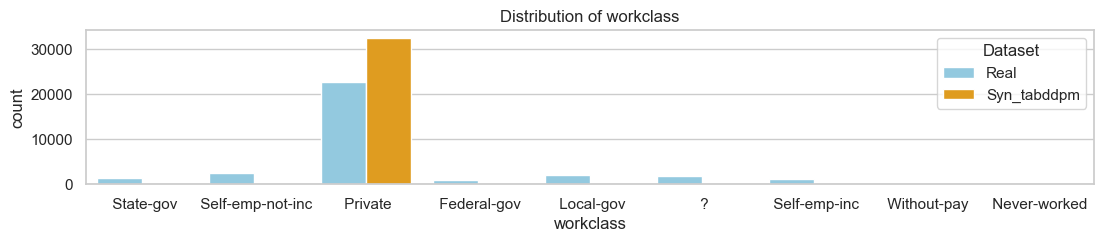

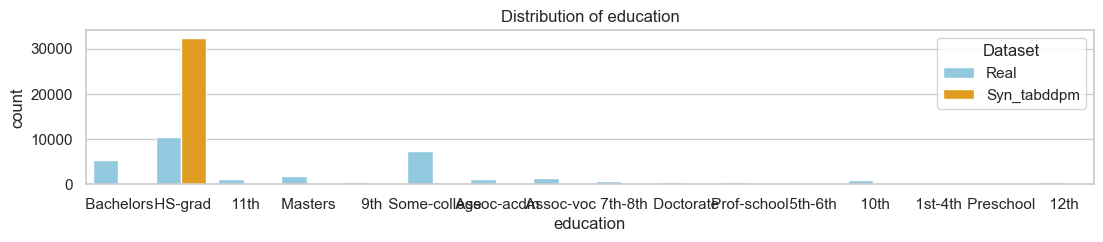

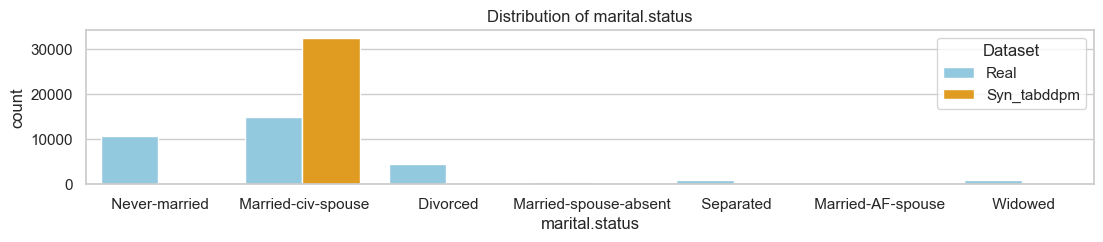

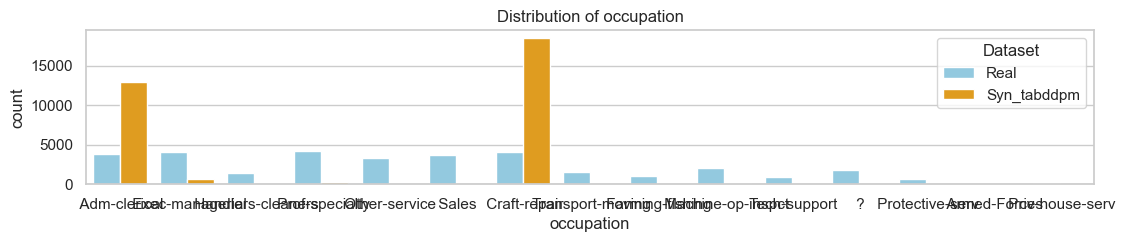

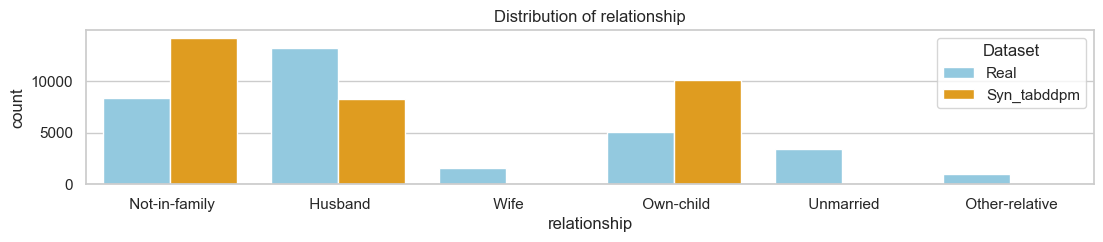

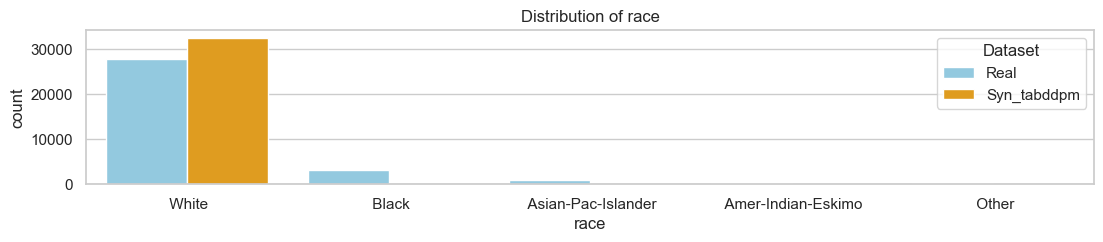

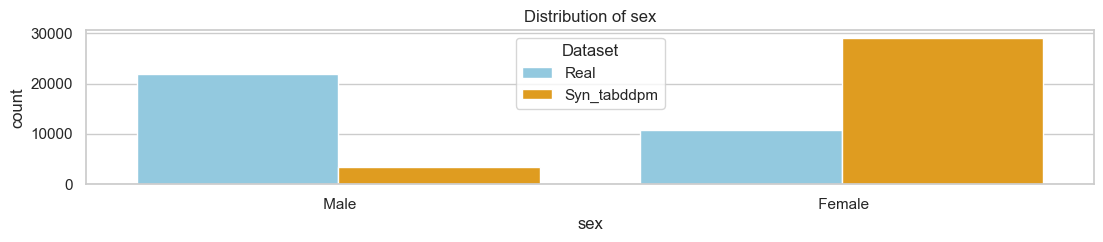

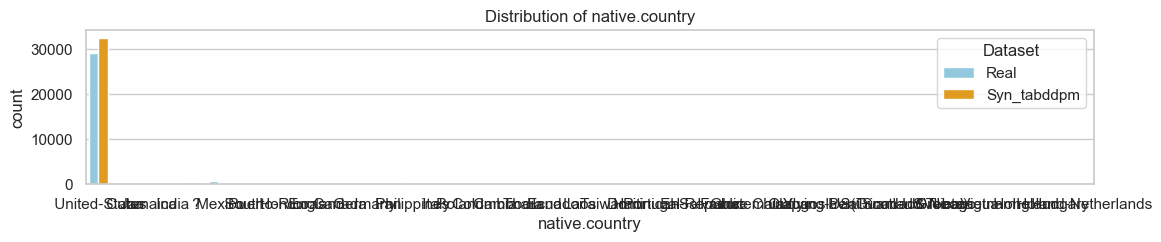

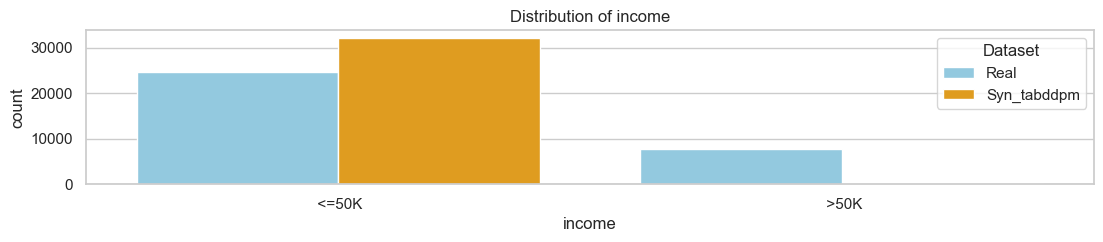

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_real and df_synthetic are your real and synthetic datasets
# and categorical_columns is a list of categorical column names

# Concatenate the datasets with an additional 'dataset' column
real_adult['dataset'] = 'Real'
syn_adult_tabddpm['dataset'] = 'Syn_tabddpm'
combined_adult1 = pd.concat([real_adult, syn_adult_tabddpm])

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a matrix of bar graphs for each categorical variable
for column in adult_cat:
    plt.figure(figsize=(13, 2))
    
    # Create a countplot for each categorical variable with different colors for real and synthetic
    sns.countplot(x=column, data=combined_adult1, hue='dataset', palette=['skyblue', 'orange'])
    
    plt.title(f'Distribution of {column}')
    plt.legend(title='Dataset')
    plt.show()


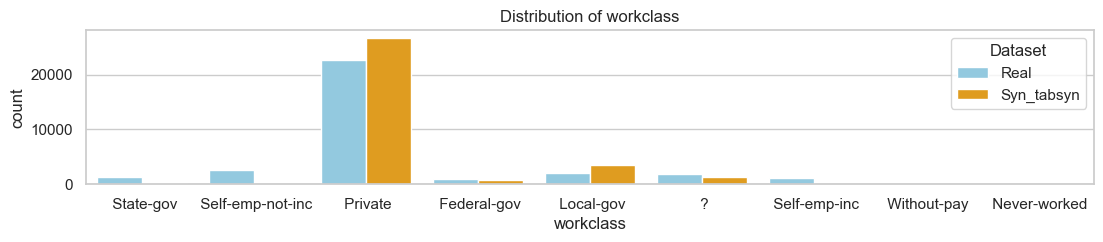

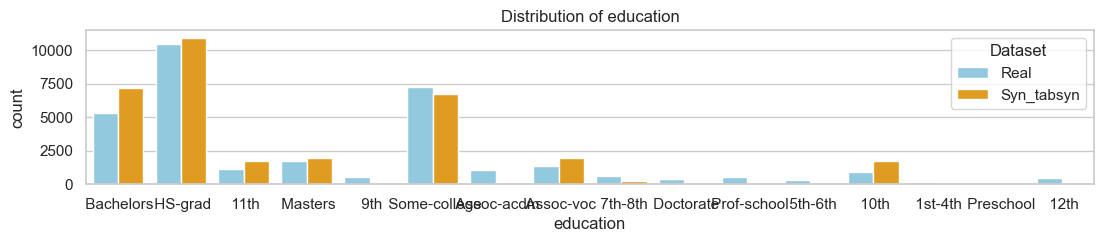

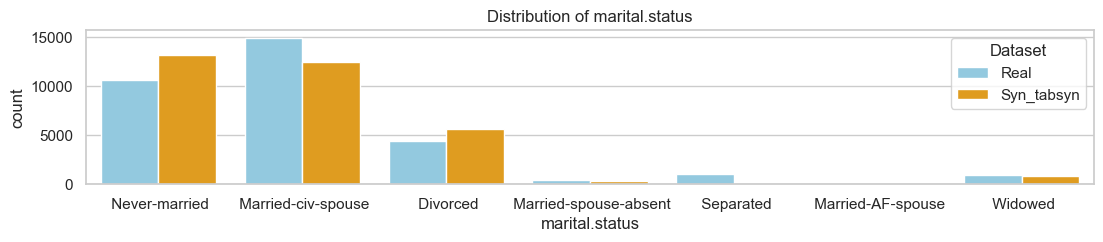

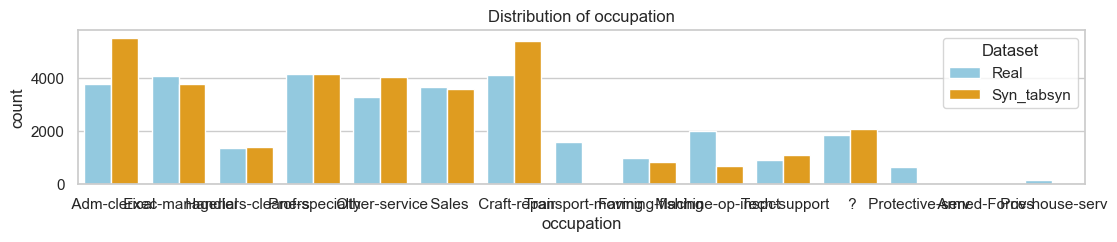

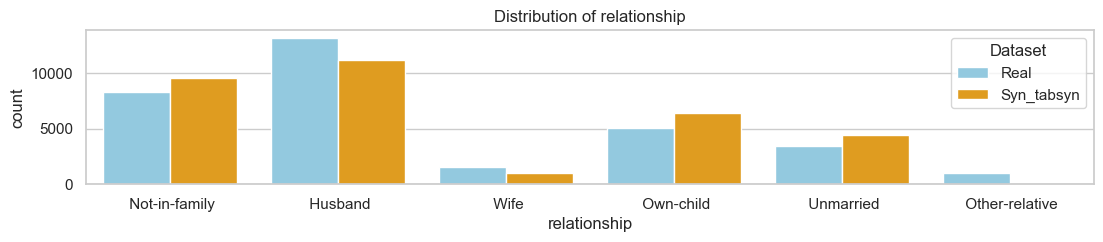

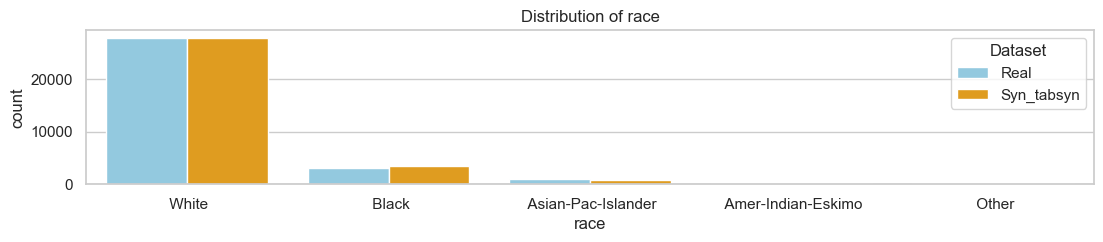

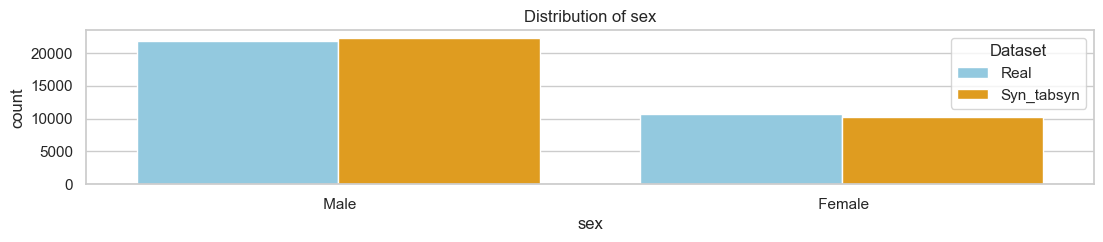

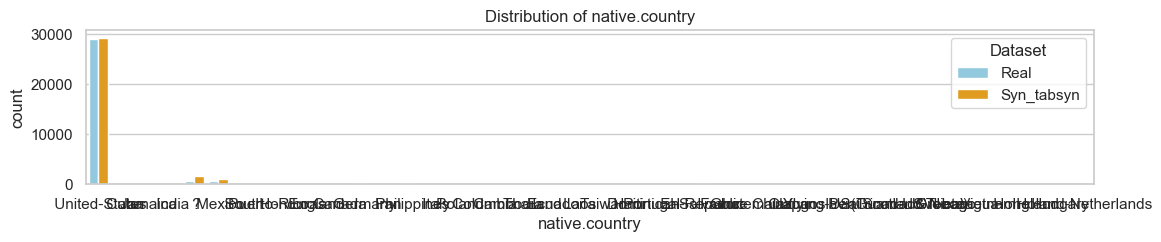

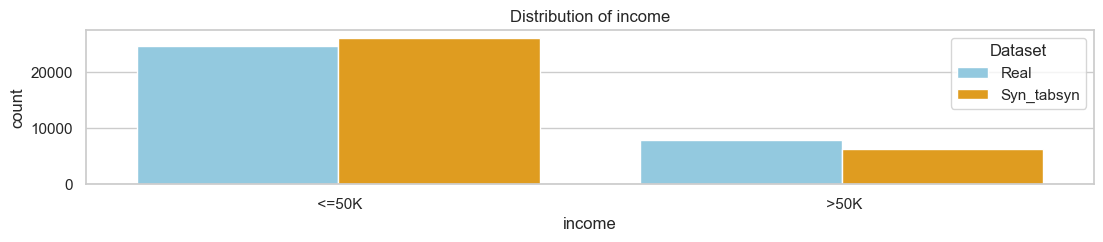

In [15]:
# Assuming df_real and df_synthetic are your real and synthetic datasets
# and categorical_columns is a list of categorical column names

# Concatenate the datasets with an additional 'dataset' column
syn_adult_tabsyn['dataset'] = 'Syn_tabsyn'
combined_adult2 = pd.concat([real_adult, syn_adult_tabsyn])

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a matrix of bar graphs for each categorical variable
for column in adult_cat:
    plt.figure(figsize=(13, 2))
    
    # Create a countplot for each categorical variable with different colors for real and synthetic
    sns.countplot(x=column, data=combined_adult2, hue='dataset', palette=['skyblue', 'orange'])
    
    plt.title(f'Distribution of {column}')
    plt.legend(title='Dataset')
    plt.show()


In [25]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


#### Numerical Variables (Distribution Charts)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


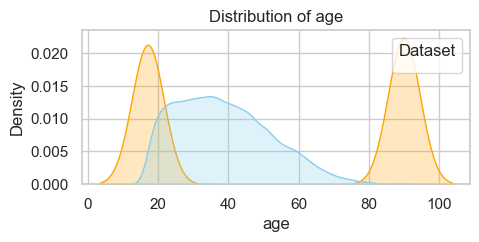

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


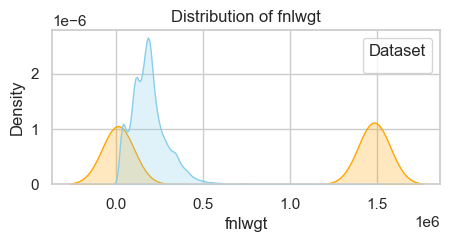

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


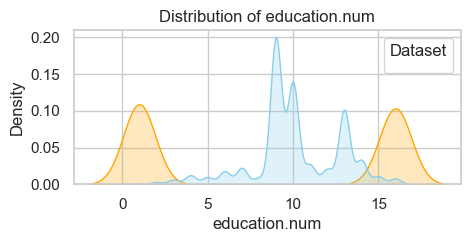

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


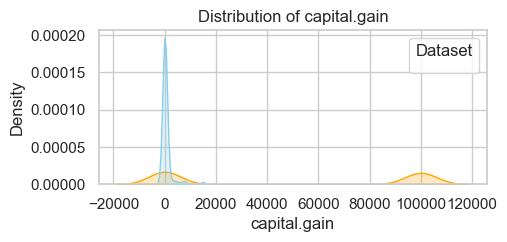

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


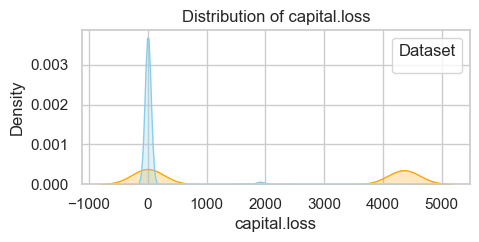

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


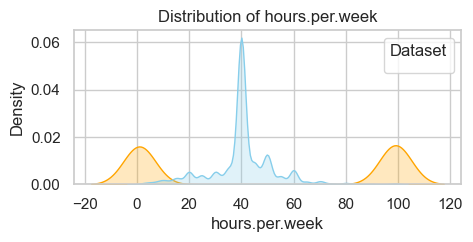

In [16]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a matrix of distribution charts for each numeric variable
for column in adult_num:
    plt.figure(figsize=(5, 2))
    
    # Create a distribution plot for each numeric variable with different colors for real and synthetic
    sns.kdeplot(data=combined_adult1, x=column, hue='dataset', fill=True, palette=['skyblue', 'orange'])
    
    plt.title(f'Distribution of {column}')
    plt.legend(title='Dataset')
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


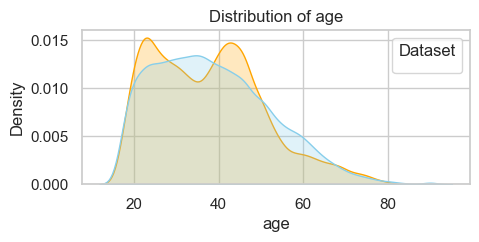

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


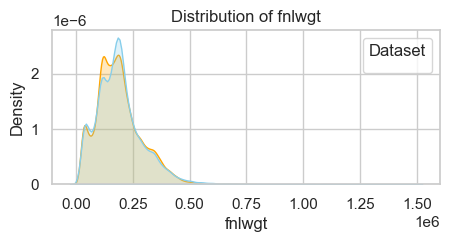

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


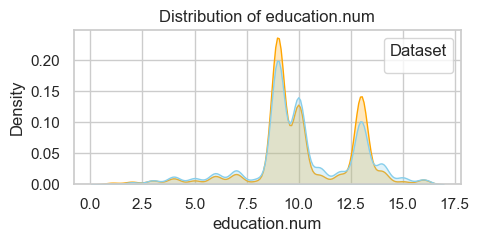

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


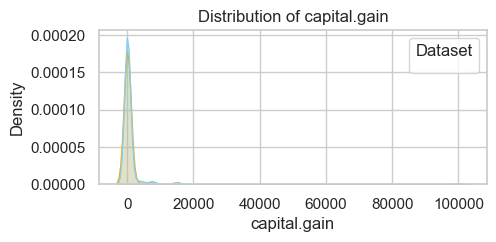

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


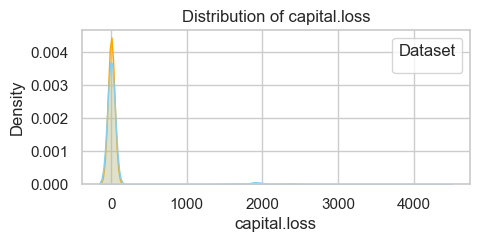

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


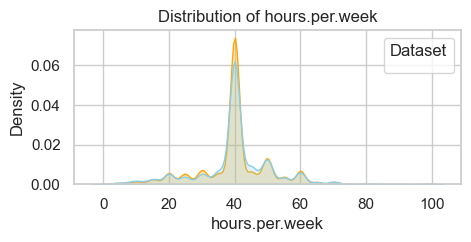

In [17]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a matrix of distribution charts for each numeric variable
for column in adult_num:
    plt.figure(figsize=(5, 2))
    
    # Create a distribution plot for each numeric variable with different colors for real and synthetic
    sns.kdeplot(data=combined_adult2, x=column, hue='dataset', fill=True, palette=['skyblue', 'orange'])
    
    plt.title(f'Distribution of {column}')
    plt.legend(title='Dataset')
    plt.show()


#### Other Metrices to evaluate the similarity for Numerical Variables

#### Kolmogorov Smirnov Test

In [18]:
from scipy.stats import ks_2samp
x = real_adult[adult_num]
y = syn_adult_tabddpm[adult_num]
z = syn_adult_tabsyn[adult_num]

print(ks_2samp(x, y))
print(ks_2samp(x, z))

KstestResult(statistic=array([0.51094868, 0.51481834, 0.51137864, 0.47212923, 0.47974571,
       0.50523633]), pvalue=array([0., 0., 0., 0., 0., 0.]), statistic_location=array([8.8000000e+01, 1.4554350e+06, 1.8698817e+00, 4.1310000e+04,
       3.9000000e+03, 9.8000000e+01]), statistic_sign=array([ 1.,  1., -1.,  1.,  1.,  1.]))
KstestResult(statistic=array([0.04526888, 0.03224717, 0.03098799, 0.02985166, 0.0201468 ,
       0.04182918]), pvalue=array([1.98204462e-29, 3.83652506e-15, 5.13716766e-14, 4.88695369e-13,
       3.59059234e-06, 3.45175703e-25]), statistic_location=array([4.9983044e+01, 1.6209392e+05, 1.3886712e+01, 5.4884160e+02,
       0.0000000e+00, 4.0993774e+01]), statistic_sign=array([-1., -1., -1., -1., -1., -1.]))
